#**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()  # Set the default parameters

#**Mounting the Drive**
**To read the file (Dataset)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/Datasets/Stock Exchange KSE 100(Pakistan).csv' #dataset file path

#**Data Collection**

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(5)

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


#**Features Overview**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3221 non-null   object
 1   Open    3221 non-null   object
 2   High    3221 non-null   object
 3   Low     3221 non-null   object
 4   Close   3221 non-null   object
 5   Change  3221 non-null   object
 6   Volume  3221 non-null   object
dtypes: object(7)
memory usage: 176.3+ KB


**Dtypes of each feature is object. Lets convert them into appropriate data type.**

In [8]:
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Change'] = df['Change'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)
df['Date']=pd.to_datetime(df['Date'])

**Now we ave the appropriate data types for each Feat**

In [9]:
# Verify the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3221 non-null   datetime64[ns]
 1   Open    3221 non-null   float64       
 2   High    3221 non-null   float64       
 3   Low     3221 non-null   float64       
 4   Close   3221 non-null   float64       
 5   Change  3221 non-null   float64       
 6   Volume  3221 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 176.3 KB


**Let check, is the data sorted w.r.t date**

In [10]:
print(f'Data is sorted w.r.t Date: {df["Date"].dt.date.is_monotonic_increasing}')

Data is sorted w.r.t Date: False


**Since, the dataset is not sorted w.r.t date. So, let sort it.**

Sorting the data by date is crucial because stock prices often exhibit temporal dependencies. The order of historical prices can impact the current price, and models require chronological data to capture these patterns effectively. This sorting also simplifies time-based splitting, feature engineering, and visualization, making our analysis and predictions more accurate and reliable.

In [11]:
df = df.sort_values(by='Date')

# Reset the index
df = df.reset_index(drop=True)

**Now the data is sorted w.r.t Date**

In [12]:
print(f'Data is sorted w.r.t Date: {df["Date"].dt.date.is_monotonic_increasing}')

Data is sorted w.r.t Date: True


In [13]:
df.head(3)

,Date,Open,High,Low,Close,Change,Volume
0,2008-02-22,10634.22,10635.42,10546.38,10607.29,0.00,313082688
1,2008-02-25,10625.66,10709.06,10579.49,10588.84,-18.45,273149184
2,2008-02-26,10596.40,10668.35,10578.01,10668.35,79.51,265668784


**Duplicate Record**

In [14]:
print(f'The Number of Duplicate Records Are: {df.duplicated().sum()}')

The Number of Duplicate Records Are: 0


**Total Instances:** `3221` <br>
**with zero duplicate record, and** `07` **Features**

In [15]:
df.shape

(3221, 7)

**Basic Satistics**

In [16]:
df.describe()

,Open,High,Low,Close,Change,Volume
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3.221000e+03
mean,18806.389208,18913.961723,18694.557457,18801.652980,6.662738,2.006365e+08
std,9556.736989,9599.905455,9502.488358,9550.963841,288.333717,1.348805e+08
min,3634.560000,3742.310000,3623.350000,3647.100000,-8060.960000,-1.525267e+08
25%,8418.150000,8479.860000,8348.880000,8426.350000,-68.460000,1.120844e+08
50%,21777.350000,21885.330000,21640.080000,21771.630000,6.330000,1.702730e+08
75%,27911.000000,28108.020000,27656.070000,27895.150000,95.560000,2.543143e+08
max,36317.920000,36389.500000,36132.760000,36234.200000,7957.090000,1.124724e+09


In [17]:
df.nunique()

Date      3221
Open      3213
High      3215
Low       3211
Close     3209
Change    3104
Volume    3220
dtype: int64

#**Missing Data**

In [196]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Change    0
Volume    0
dtype: int64

#**Feature Selection**

**Use the Close Stock Price Column to Train Your Model.**

The closing price is a fundamental piece of information for stock analysis. It represents the final traded price for the day, which can be influenced by various factors and information available up to that point.

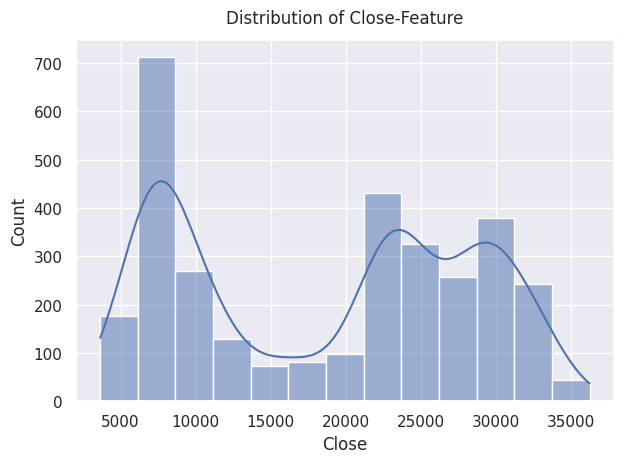

In [197]:
sns.histplot(x='Close', data=df, kde=True)
plt.title(f'Distribution of Close-Feature', fontsize=12, pad=12)
plt.tight_layout()
plt.show()

In [326]:
df.iloc[:,4:5].head(5)

,Close
0,10607.29
1,10588.84
2,10668.35
3,10664.36
4,10704.15


In [354]:
selected_feat = df.iloc[:,4:5]
selected_feat.shape

(3221, 1)

# **Data Splitting**

In [355]:
train_size=0.8
train_len = int(len(selected_feat)*train_size)
train_len

2576

In [356]:
Xtrain = selected_feat[:train_len]
Xtest  = selected_feat[train_len:]

In [357]:
Xtrain.shape, Xtest.shape

((2576, 1), (645, 1))

**Let visulise the data**

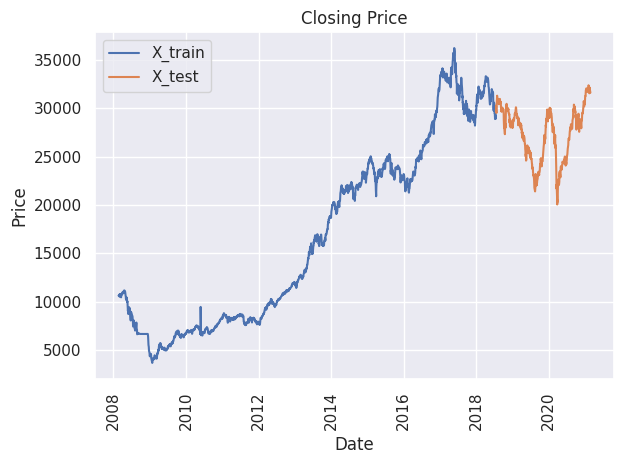

In [358]:
plt.plot(df['Date'][:train_len],Xtrain.values, label='X_train')
plt.plot(df['Date'][train_len:],Xtest.values, label='X_test')
plt.title('Closing Price')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

#**Data Scaling**

In [359]:
from sklearn.preprocessing import MinMaxScaler

In [360]:
scaler = MinMaxScaler(feature_range=(0,1))

In [361]:
scaler.fit(Xtrain)

Xtrain_Scaled = scaler.transform(Xtrain)
Xtest_Scaled = scaler.transform(Xtest)

Xtrain_Scaled[:5], Xtest_Scaled[:5]

(array([[0.21358728],
        [0.2130211 ],
        [0.21546103],
        [0.21533858],
        [0.21655962]]),
 array([[0.80043238],
        [0.8169963 ],
        [0.80706507],
        [0.7937552 ],
        [0.80928159]]))

**Now all values are between 0 and 1, while the underlying pattern is preserved**

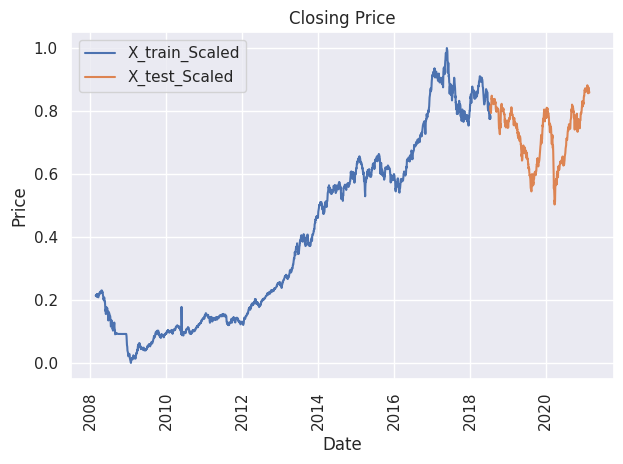

In [362]:
plt.plot(df['Date'][:train_len],Xtrain_Scaled, label='X_train_Scaled')
plt.plot(df['Date'][train_len:],Xtest_Scaled, label='X_test_Scaled')
plt.title('Closing Price')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

#**Create Dataset**

**About Timestep**

* **timestep=1:** This will train the model to predict the next day's closing price based on the current day's closing price.


* **timestep=5:** This will train the model to predict the closing price five days in advance based on the current day's closing price and the previous four days' closing prices.

In [363]:
def create_dataset(data, timestep=5): #Set the default value to "5"
  X = []
  y = []
  for i in range(len(data)-5):
    X.append(data[i:i+timestep, 0])
    y.append(data[i+timestep, 0])
  return np.array(X), np.array(y)

In [364]:
X_train, y_train = create_dataset(Xtrain_Scaled)
X_test, y_test = create_dataset(Xtest_Scaled)

In [365]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2571, 5), (2571,), (640, 5), (640,))

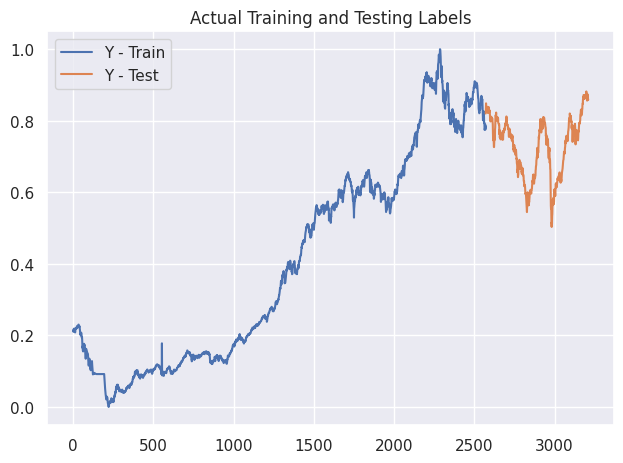

In [366]:
plt.plot(y_train, label='Y - Train')
plt.plot(range(len(y_train),len(y_train)+len(y_test)), y_test, label='Y - Test')
plt.title('Actual Training and Testing Labels')
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

**Reshape the X-data, as per the requirement of LSTM**

In [367]:
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]
X_train.shape, X_test.shape

((2571, 5, 1), (640, 5, 1))

In [368]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.regularizers import l2

In [369]:
model = Sequential()

model.add(LSTM(units=100, input_shape=(X_train.shape[1], 1), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(LSTM(units=50, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(LSTM(units=25, kernel_regularizer=l2(0.01)))

# Add dropout layers to prevent overfitting
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [370]:
model = Sequential()

model.add(LSTM(units=100, input_shape = (X_train.shape[1],1), return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=25))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [371]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 5, 100)            40800     
                                                                 
 lstm_44 (LSTM)              (None, 5, 50)             30200     
                                                                 
 lstm_45 (LSTM)              (None, 25)                7600      
                                                                 
 dense_14 (Dense)            (None, 1)                 26        
                                                                 
Total params: 78626 (307.13 KB)
Trainable params: 78626 (307.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [372]:
model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
81/81 [==============================] - 8s 21ms/step - loss: 0.0277
Epoch 2/15
81/81 [==============================] - 2s 21ms/step - loss: 2.4009e-04
Epoch 3/15
81/81 [==============================] - 1s 15ms/step - loss: 1.4429e-04
Epoch 4/15
81/81 [==============================] - 1s 13ms/step - loss: 1.4101e-04
Epoch 5/15
81/81 [==============================] - 1s 14ms/step - loss: 1.3476e-04
Epoch 6/15
81/81 [==============================] - 1s 13ms/step - loss: 1.3407e-04
Epoch 7/15
81/81 [==============================] - 1s 13ms/step - loss: 1.2788e-04
Epoch 8/15
81/81 [==============================] - 1s 13ms/step - loss: 1.2689e-04
Epoch 9/15
81/81 [==============================] - 1s 13ms/step - loss: 1.3870e-04
Epoch 10/15
81/81 [==============================] - 1s 13ms/step - loss: 1.3175e-04
Epoch 11/15
81/81 [==============================] - 1s 13ms/step - loss: 1.2760e-04
Epoch 12/15
81/81 [==============================] - 2s 20ms/step - loss: 1.45

In [373]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

20/20 [==============================] - 0s 5ms/step


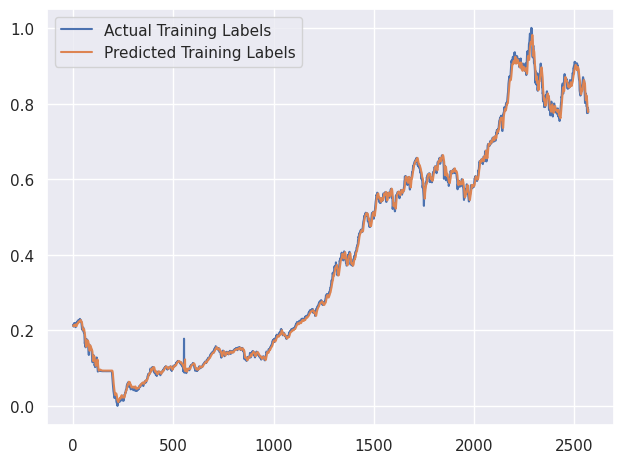

In [374]:
plt.plot(y_train, label='Actual Training Labels')
plt.plot(train_pred, label='Predicted Training Labels')
plt.tight_layout()
plt.legend()
plt.show()

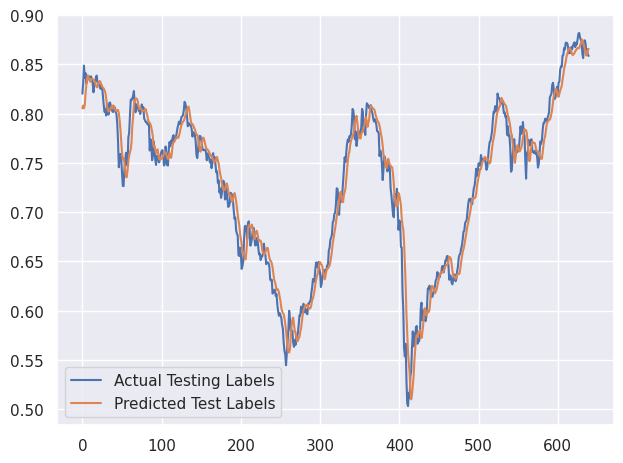

In [375]:
plt.plot(y_test, label='Actual Testing Labels')
plt.plot(test_pred, label='Predicted Test Labels')
plt.tight_layout()
plt.legend()
plt.show()

#**Rescaling to Original Scale**

**Rescale to originnal scale and then visulise it again**

In [376]:
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(y_train[:,np.newaxis])
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test[:,np.newaxis])

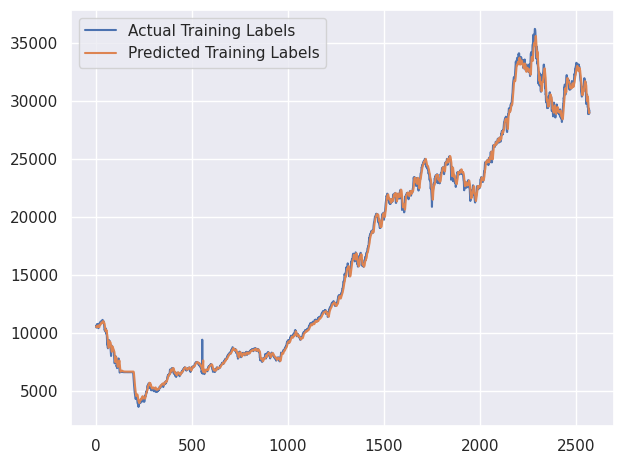

In [377]:
plt.plot(y_train, label='Actual Training Labels')
plt.plot(train_pred, label='Predicted Training Labels')
plt.tight_layout()
plt.legend()
plt.show()

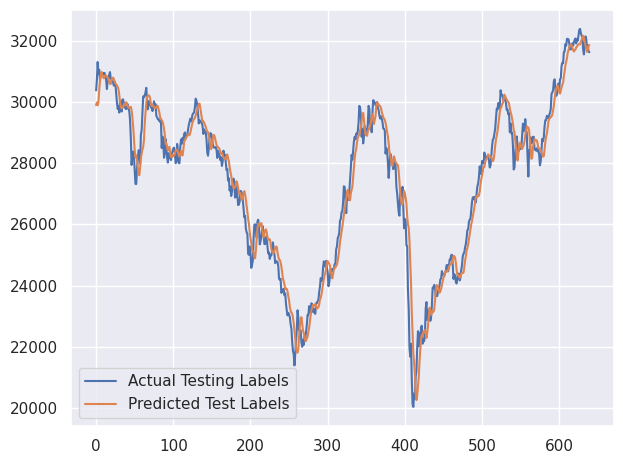

In [378]:
plt.plot(y_test, label='Actual Testing Labels')
plt.plot(test_pred, label='Predicted Test Labels')
plt.tight_layout()
plt.legend()
plt.show()

**Together:**

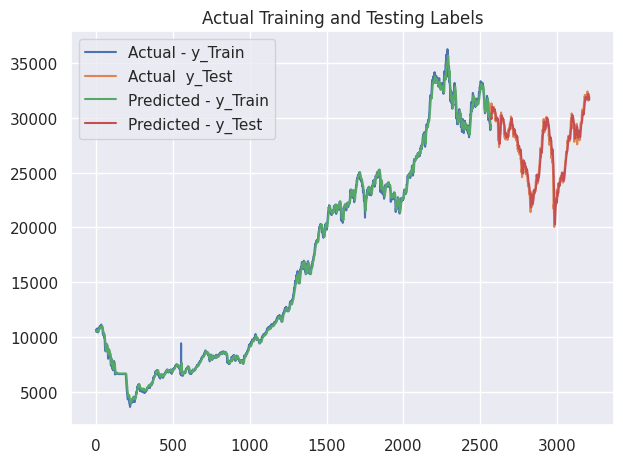

In [379]:
plt.plot(y_train, label='Actual - y_Train')
plt.plot(range(len(y_train),len(y_train)+len(y_test)), y_test, label='Actual  y_Test')

plt.plot(train_pred, label='Predicted - y_Train')
plt.plot(range(len(train_pred),len(train_pred)+len(test_pred)), test_pred, label='Predicted - y_Test')

plt.title('Actual Training and Testing Labels')
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [380]:
print(f'Training Error (RMSE): {np.sqrt(np.mean(y_train-train_pred)**2): .4f}')
print(f'Testing  Error (RMSE): {np.sqrt(np.mean(y_test-test_pred)**2): .4f}')

Training Error (RMSE):  27.4892
Testing  Error (RMSE):  16.8315
